In [46]:
!pip install yellowbrick
!pip install kneed

In [15]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from kneed import KneeLocator, DataGenerator as dg
import matplotlib.pyplot as plt

# <div dir="rtl">سوال 1:</div>


<div style="direction:rtl">
    ابتدا دیتاست مربوطه را میخوانیم و با بررسی ابعاد و چند سطر ابتدایی آن سعی در شناخت آن داریم.

</div>

In [3]:
df = pd.read_csv("C:\8 - Eight term\Data minning\Homeworks\hw4\FDM2022-HW4\datasets\Wholesale customers data.csv")

In [4]:
df.shape

(440, 8)

In [5]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<div style="text-align: right">

در اینجا بررسی میکنیم که آیا دستاست مقدار null دارد یا خیر که آنرا مرتفع کنیم و میبینیم هیچ مقدار null ای وجود ندارد
    
</div>


<div style="text-align: right"> در اینجا بررسی میکنیم مقدار null وحود دارد یا نه </div>


<div style="direction:rtl">

    در اینجا بررسی میکنیم که آیا در بین مقادیر مقدار null وجود داشته یا خیر که در صورت وجود آنرا مرتفع کنیم
    
    با بررسی ستونهای دیتاست میبینیم همه ی ویژگی ها مقدار دارند و نیاز به اقدامی برای حذف یا جایگزینی مقادیر null نیست.
    
</div>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


# <div dir="rtl"> حذف داده های پرت با روش z-score </div>


In [7]:
df_without_outliers = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

# <div dir="rtl"> نرمالسازی دیتافریم با توابع آماده پایتون </div>


In [8]:
df_normalized = preprocessing.normalize(df_without_outliers, axis=0)

# <div dir="rtl"> کاهش ابعاد داده ها با روش PCA به دو ویژگی </div>

In [9]:
pca = PCA(n_components=2)
df_pca_dimension_reduction = pca.fit_transform(df_normalized)

# <div dir="rtl"> تعیین k مناسب با استفاده از روش elbow </div>

<div style="direction:rtl">

    با استفاده از روش elbow و رسم نمودار sse بر پایه ی تعداد کلاسترها در میابیم که بهترین تعداد کلاسترها برابر با 4 است.
    
</div>

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


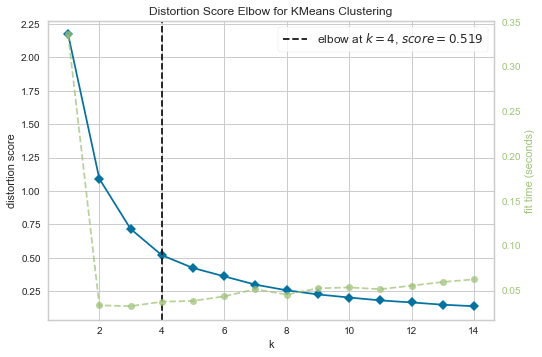

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(1,15))
distortion_visualizer.fit(df_pca_dimension_reduction)       
distortion_visualizer.show()       

# <div dir="rtl"> تعیین k مناسب با استفاده از روش knee </div>


<div style="direction:rtl">

    با استفاده از روش knee میبینیم همانند روش elbrow بهترین تعداد کلاستر برابر با 4 است.
    
</div>

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


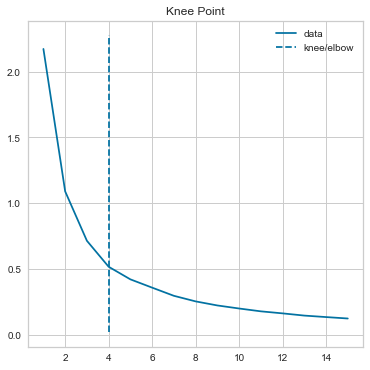

In [47]:
sse = {}
for k in range(1, 16):
    kmeans = KMeans(n_clusters = k, random_state=42).fit(df_pca_dimension_reduction)
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_
kl = KneeLocator(list(sse.keys()), list(sse.values()), direction= 'decreasing', curve='convex')
kl.plot_knee()

In [28]:
kl.knee

4

# <div dir="rtl"> تعیین کردن اعضای کلاسترها و رسم نمودار scatter plot آنها </div>

<div style="direction:rtl">


    
</div>

In [29]:
kmeans = KMeans(n_clusters = kl.knee, random_state=42).fit(df_pca_dimension_reduction)
labels = kmeans.fit_predict(df_pca_dimension_reduction)

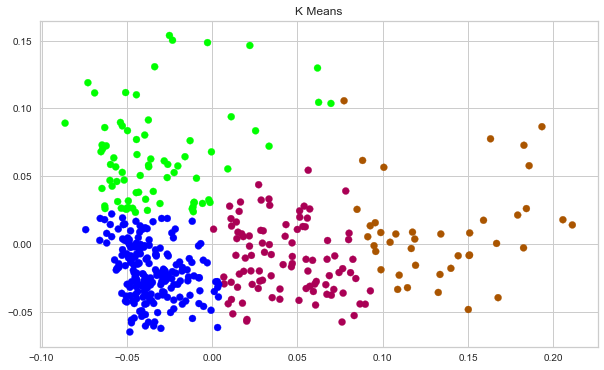

In [34]:
f, (ax1) = plt.subplots(1, 1, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(df_pca_dimension_reduction[:,0],df_pca_dimension_reduction[:,1],c=kmeans.labels_,cmap='brg')

In [43]:
pd.DataFrame(df_pca_dimension_reduction[labels==0]).describe()

,0,1
count,202.000000,202.000000
mean,-0.035613,-0.020505
std,0.015627,0.020287
min,-0.074163,-0.064641
25%,-0.046072,-0.035349
50%,-0.038928,-0.021970
75%,-0.026472,-0.007013
max,0.003810,0.022254


In [44]:
pd.DataFrame(df_pca_dimension_reduction[labels==1]).describe()

,0,1
count,96.000000,96.000000
mean,0.042645,-0.010906
std,0.024384,0.025747
min,0.000809,-0.057303
25%,0.020356,-0.031179
50%,0.040675,-0.013052
75%,0.060268,0.009103
max,0.092761,0.054474


In [45]:
pd.DataFrame(df_pca_dimension_reduction[labels==2]).describe()

,0,1
count,41.000000,41.000000
mean,0.134256,0.009774
std,0.037088,0.035108
min,0.077317,-0.048081
25%,0.100646,-0.008503
50%,0.132554,0.005498
75%,0.163194,0.018005
max,0.211158,0.105625


In [46]:
pd.DataFrame(df_pca_dimension_reduction[labels==3]).describe()

,0,1
count,75.000000,75.000000
mean,-0.032063,0.063844
std,0.031729,0.034619
min,-0.086259,0.023472
25%,-0.053534,0.032283
50%,-0.039549,0.057620
75%,-0.012330,0.083566
max,0.069636,0.153710
